In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# Built-in
import os
import sys

# Libs
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [2]:
# Libs
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

# Pytorch
import torch
from torch import optim
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable

In [3]:
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(0, '../mrs/')

# Own modules
from data import data_loader, data_utils
from mrs_utils import misc_utils, vis_utils#, eval_utils
from network import network_io, network_utils

In [4]:
# Own modules
sys.path.insert(0, '../')
from model_scripts.eval_tools import (make_colormap, make_geo_file_list, get_predicted_images,
                                      make_pictures, plot_results, evaluate_class_predictions_step,
                                      confusion_matrix, plot_colormap, class_count)

In [5]:
# Settings
GPU = 0
#MODEL_DIR = r'/home/wh145/models/geodome/sebas/ecresnet50_dcunet_dsgeodome_new_lre1e-03_lrd1e-02_ep100_bs4_ds10_dr0p1_crxent'
#MODEL_DIR = r'/home/ss1072/dev_overfit/ecresnet50_dcunet_dsgeodome_lre1e-03_lrd1e-02_ep100_bs4_ds50_dr0p1_crxent'
MODEL_DIR = r'/home/wh145/models/geodome/dev_210402_inria_pretrained/2classes_filter/ecresnet50_dcunet_dsgeodome_lre1e-03_lrd1e-02_ep50_bs4_ds50_dr0p1_crxent'
LOAD_EPOCH = 50
PATCHS_SIZE = (512, 512)

n_class = 4
colormap = make_colormap(n_class)

#data_dir = "/home/ss1072/data_210310/patches/"
#train_file = "/home/ss1072/data_210310/handpicked_train.txt"
#valid_file = "/home/ss1072/data_210310/handpicked_train.txt"
data_dir = "/home/ss1072/data_210402/patches/"
train_file = "/home/ss1072/data_210402/2classes_train.txt"
valid_file = "/home/ss1072/data_210402/file_list_valid.txt"

mean = (0.4129263824793889, 0.4767720160757974, 0.3984073274418315)
std = (0.14656521236460246, 0.13501648873005756, 0.11508977871331538)

geographies = ['barren', 'crops', 'developed', 'forest', 'grassland', 'open_water', 'pasture', 'scrub', 'wetlands']
#make_geo_file_list(data_dir, train_file, valid_file) # Creates txt with file lists for each geography

In [6]:
device, _ = misc_utils.set_gpu(GPU)

# init model
args = network_io.load_config(MODEL_DIR)
model = network_io.create_model(args)
if LOAD_EPOCH:
    args['trainer']['epochs'] = LOAD_EPOCH
ckpt_dir = os.path.join(MODEL_DIR, 'epoch-{}.pth.tar'.format(args['trainer']['epochs']))
network_utils.load(model, ckpt_dir)
print('Loaded from {}'.format(ckpt_dir))
model.to(device)
model.eval()

tsfms = [A.Flip(), A.RandomRotate90(), A.Normalize(mean=mean, std=std), ToTensorV2()]
tsfm_train = A.Compose(tsfms)
tsfm_valid = A.Compose(tsfms[-2:])

Device being used: cuda:0
Loaded from /home/wh145/models/geodome/dev_210402_inria_pretrained/2classes_filter/ecresnet50_dcunet_dsgeodome_lre1e-03_lrd1e-02_ep50_bs4_ds50_dr0p1_crxent/epoch-50.pth.tar


In [7]:
test_loader = DataLoader(data_loader.get_loader(
    data_dir, valid_file, transforms=tsfm_valid,
    n_class=n_class, with_aux=False),
                         batch_size=5, shuffle=False, num_workers=8)

In [98]:
img_images, lbl_images, pred_images = get_predicted_images(test_loader, device, model, num_batches=120)

100%|██████████| 12/12 [00:02<00:00,  4.48it/s]


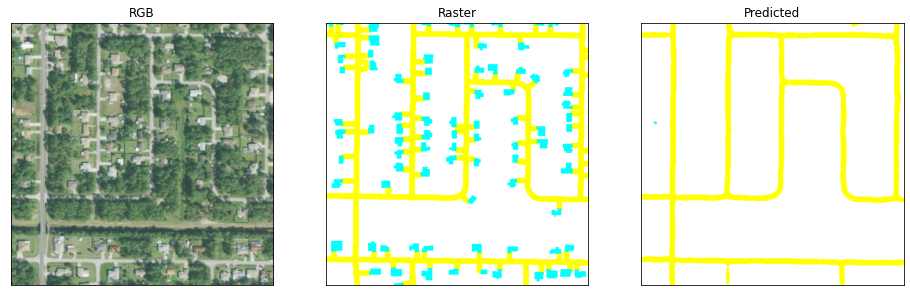

In [99]:
plot_results(10, 4, img_images, lbl_images, pred_images, colormap, mean, std)

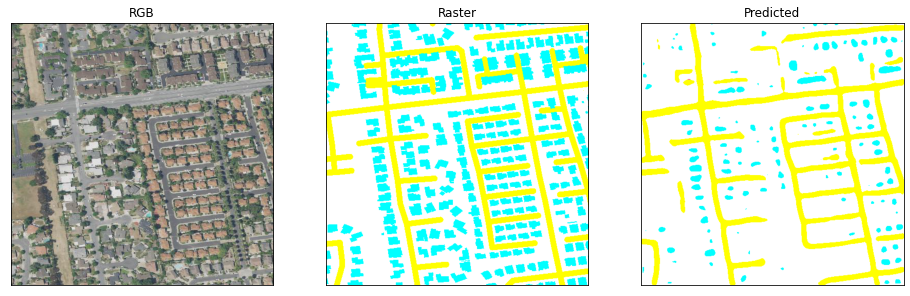

In [100]:
plot_results(1, 3, img_images, lbl_images, pred_images, colormap, mean, std)

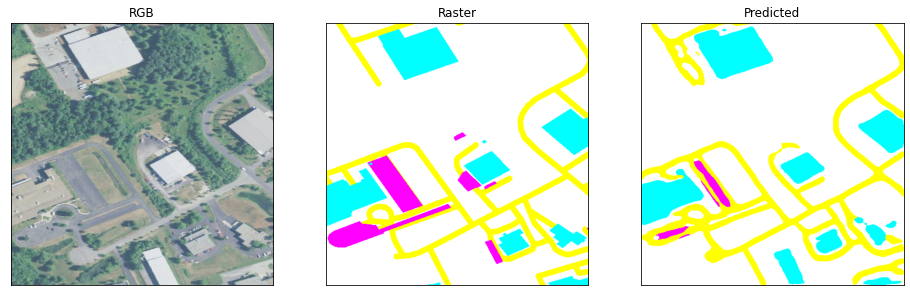

In [101]:
plot_results(11, 4, img_images, lbl_images, pred_images, colormap, mean, std)

In [8]:
train_loader = DataLoader(data_loader.get_loader(
    data_dir, train_file, transforms=tsfm_valid,
    n_class=n_class, with_aux=False),
                         batch_size=5, shuffle=False, num_workers=8)

valid_loader = DataLoader(data_loader.get_loader(
    data_dir, valid_file, transforms=tsfm_valid,
    n_class=n_class, with_aux=False),
                         batch_size=5, shuffle=False, num_workers=8)

In [113]:
img_images, lbl_images, pred_images = get_predicted_images(train_loader, device, model, num_batches=120)

 13%|█▎        | 120/957 [00:21<02:28,  5.65it/s]


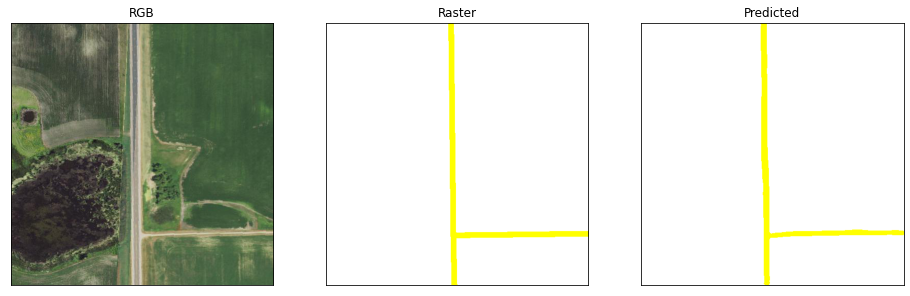

In [104]:
plot_results(99, 0, img_images, lbl_images, pred_images, colormap, mean, std)

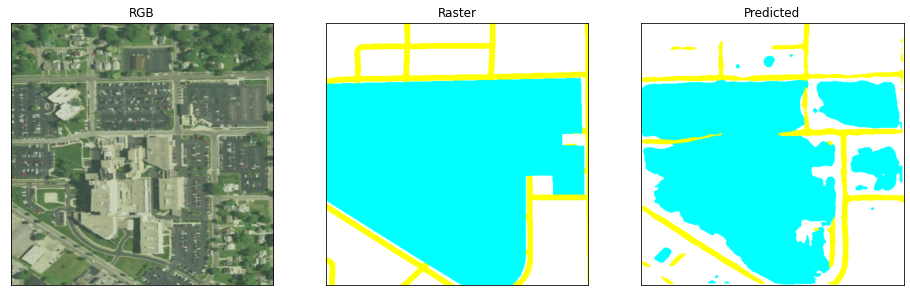

In [114]:
plot_results(107, 0, img_images, lbl_images, pred_images, colormap, mean, std)

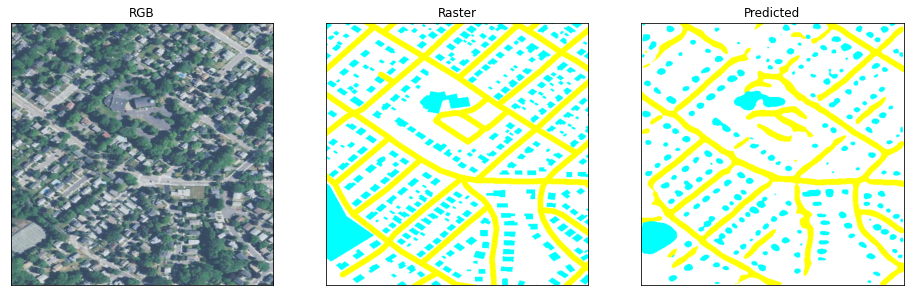

In [116]:
plot_results(115, 0, img_images, lbl_images, pred_images, colormap, mean, std)

In [9]:
cm_0 = evaluate_class_predictions_step(0, train_loader, device, model) # first argument is class (cls)
cm_1 = evaluate_class_predictions_step(1, train_loader, device, model) # first argument is class (cls)
cm_2 = evaluate_class_predictions_step(2, train_loader, device, model) # first argument is class (cls)
cm_3 = evaluate_class_predictions_step(3, train_loader, device, model) # first argument is class (cls)

Loading first 100 batches...


  0%|          | 0/957 [00:00<?, ?it/s]/home/helios/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
  0%|          | 0/100 [00:00<?, ?it/s]

Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 41.06it/s]


Loading next 100 batches...


 21%|██        | 200/957 [00:16<01:04, 11.81it/s]


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 31%|███▏      | 300/957 [00:19<00:42, 15.33it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.12it/s]


Loading next 100 batches...


 42%|████▏     | 400/957 [00:20<00:28, 19.32it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 52%|█████▏    | 500/957 [00:21<00:19, 22.93it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 63%|██████▎   | 600/957 [00:22<00:13, 26.21it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.65it/s]


Loading next 100 batches...


 73%|███████▎  | 700/957 [00:23<00:08, 29.21it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 84%|████████▎ | 800/957 [00:24<00:04, 32.04it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 94%|█████████▍| 900/957 [00:26<00:01, 34.55it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.54it/s]


Loading next 100 batches...


100%|██████████| 957/957 [00:20<00:00, 46.18it/s] 


Evaluating predictions...


100%|██████████| 57/57 [00:01<00:00, 42.89it/s]


Loading first 100 batches...


 10%|█         | 100/957 [00:17<02:33,  5.57it/s]


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 42.26it/s]


Loading next 100 batches...


 21%|██        | 200/957 [00:18<01:08, 11.00it/s]


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 31%|███▏      | 300/957 [00:19<00:43, 15.08it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.83it/s]


Loading next 100 batches...


 42%|████▏     | 400/957 [00:20<00:29, 19.12it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 52%|█████▏    | 500/957 [00:21<00:20, 22.77it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 41.22it/s]


Loading next 100 batches...


 63%|██████▎   | 600/957 [00:23<00:13, 26.00it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.82it/s]


Loading next 100 batches...


 73%|███████▎  | 700/957 [00:24<00:08, 28.99it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 41.55it/s]


Loading next 100 batches...


 84%|████████▎ | 800/957 [00:25<00:04, 31.75it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.22it/s]


Loading next 100 batches...


 94%|█████████▍| 900/957 [00:26<00:01, 34.47it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


100%|██████████| 957/957 [00:19<00:00, 48.74it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading first 100 batches...


 10%|█         | 100/957 [00:17<02:33,  5.57it/s]


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.02it/s]


Loading next 100 batches...


  0%|          | 0/100 [00:00<?, ?it/s]

Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 40.86it/s]


Loading next 100 batches...


 31%|███▏      | 300/957 [00:20<00:43, 14.99it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 42%|████▏     | 400/957 [00:20<00:29, 19.07it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.27it/s]


Loading next 100 batches...


 52%|█████▏    | 500/957 [00:21<00:20, 22.73it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 63%|██████▎   | 600/957 [00:23<00:13, 26.04it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.31it/s]


Loading next 100 batches...


 73%|███████▎  | 700/957 [00:24<00:08, 29.03it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.84it/s]


Loading next 100 batches...


 84%|████████▎ | 800/957 [00:25<00:04, 31.85it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 41.80it/s]


Loading next 100 batches...


 94%|█████████▍| 900/957 [00:26<00:01, 34.50it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 40.11it/s]


Loading next 100 batches...


100%|██████████| 957/957 [00:19<00:00, 48.64it/s] 


Evaluating predictions...


100%|██████████| 57/57 [00:01<00:00, 39.57it/s]


Loading first 100 batches...


 10%|█         | 100/957 [00:17<02:33,  5.57it/s]


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 39.64it/s]


Loading next 100 batches...


 21%|██        | 200/957 [00:18<01:11, 10.56it/s]


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 41.58it/s]


Loading next 100 batches...


 31%|███▏      | 300/957 [00:19<00:43, 15.01it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 42%|████▏     | 400/957 [00:20<00:29, 19.15it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 41.06it/s]


Loading next 100 batches...


 52%|█████▏    | 500/957 [00:22<00:20, 22.68it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 63%|██████▎   | 600/957 [00:23<00:13, 26.00it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 40.98it/s]


Loading next 100 batches...


 73%|███████▎  | 700/957 [00:24<00:08, 29.03it/s] 


Evaluating predictions...


  0%|          | 0/957 [00:00<?, ?it/s]

Loading next 100 batches...


 84%|████████▎ | 800/957 [00:25<00:04, 31.80it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 41.59it/s]


Loading next 100 batches...


 94%|█████████▍| 900/957 [00:26<00:01, 34.37it/s] 


Evaluating predictions...


100%|██████████| 100/100 [00:02<00:00, 41.71it/s]


Loading next 100 batches...


100%|██████████| 957/957 [00:19<00:00, 48.67it/s] 


Evaluating predictions...


100%|██████████| 57/57 [00:01<00:00, 40.80it/s]


In [10]:
confusion_matrix(cm_0, 0)
confusion_matrix(cm_1, 1)
confusion_matrix(cm_2, 2)
confusion_matrix(cm_3, 3)

-----------------------------------------------------------------------------------------------
Class 0                                        |Raster (Actual)                |              
                                               ---------------------------------               
                                               |Class 0        |Other          |               
                                               ---------------------------------               
                                               |  1,159,415,320|     94,157,288|               
                                               |         92.49%|          7.51%|               
-----------------------------------------------------------------------------------------------
Prediction     |Class 0        |  1,184,863,915|  1,147,531,877|     37,332,038|Precision      
               |               |         94.52%|         91.54%|          2.98%|         0.9685
               --------------------------

((0.8132, 0.9749, 0.5974, 0.9913, 0.9679),
 (74591180, 1178981428, 54796246, 1198776362, 1253572608))

In [11]:
cm_0 = evaluate_class_predictions_step(0, valid_loader, device, model) # first argument is class (cls)
cm_1 = evaluate_class_predictions_step(1, valid_loader, device, model) # first argument is class (cls)
cm_2 = evaluate_class_predictions_step(2, valid_loader, device, model) # first argument is class (cls)
cm_3 = evaluate_class_predictions_step(3, valid_loader, device, model) # first argument is class (cls)

Loading first 100 batches...


100%|██████████| 12/12 [00:02<00:00,  4.13it/s]


Evaluating predictions...


  0%|          | 0/12 [00:00<?, ?it/s]

Loading first 100 batches...


100%|██████████| 12/12 [00:02<00:00,  4.24it/s]


Evaluating predictions...


  0%|          | 0/12 [00:00<?, ?it/s]

Loading first 100 batches...


100%|██████████| 12/12 [00:02<00:00,  4.21it/s]


Evaluating predictions...


  0%|          | 0/12 [00:00<?, ?it/s]

Loading first 100 batches...


100%|██████████| 12/12 [00:02<00:00,  4.19it/s]


Evaluating predictions...


100%|██████████| 12/12 [00:00<00:00, 31.15it/s]


In [12]:
confusion_matrix(cm_0, 0)
confusion_matrix(cm_1, 1)
confusion_matrix(cm_2, 2)
confusion_matrix(cm_3, 3)

-----------------------------------------------------------------------------------------------
Class 0                                        |Raster (Actual)                |              
                                               ---------------------------------               
                                               |Class 0        |Other          |               
                                               ---------------------------------               
                                               |     12,358,337|      3,370,303|               
                                               |         78.57%|         21.43%|               
-----------------------------------------------------------------------------------------------
Prediction     |Class 0        |     13,935,969|     12,112,072|      1,823,897|Precision      
               |               |         88.60%|         77.01%|         11.60%|         0.8691
               --------------------------

((0.8364, 0.954, 0.6467, 0.983, 0.9432),
 (1860825, 13867815, 1438843, 14289797, 15728640))

In [28]:
import json
#titles_json = open('59_class_names.json')
titles_json = open('4_class_names.json')
titles = json.load(titles_json)

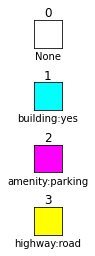

In [29]:
plot_colormap(0, 4, colormap, titles)

In [7]:
class_counts = class_count(59, 
                           ["/home/ss1072/data_210310/file_list_train.txt", 
                            "/home/ss1072/data_210310/file_list_valid.txt"], 
                           '/home/ss1072/data_210310/patches/')

Processing /home/ss1072/data_210310/file_list_train.txt...


100%|██████████| 15364/15364 [03:49<00:00, 66.94it/s]


Processing /home/ss1072/data_210310/file_list_valid.txt...


100%|██████████| 290/290 [00:04<00:00, 65.98it/s]


In [8]:
class_counts

{0: 3970092690,
 1: 1834105,
 2: 21375,
 3: 86190,
 4: 1094,
 5: 464318,
 6: 509,
 7: 359550,
 8: 2781,
 9: 140962,
 10: 7516,
 11: 7,
 12: 952,
 13: 1863498,
 14: 0,
 15: 13192,
 16: 323679,
 17: 29949788,
 18: 32584,
 19: 86722,
 20: 869880,
 21: 1562328,
 22: 2434114,
 23: 1257990,
 24: 31671,
 25: 3,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 11417917,
 32: 9066240,
 33: 5800,
 34: 2914798,
 35: 4616427,
 36: 143900,
 37: 272302,
 38: 13742,
 39: 769707,
 40: 1925640,
 41: 21856,
 42: 0,
 43: 886,
 44: 0,
 45: 0,
 46: 509989,
 47: 15772755,
 48: 0,
 49: 1652501,
 50: 126212,
 51: 4693046,
 52: 6131780,
 53: 29441204,
 54: 14409,
 55: 242338,
 56: 36882,
 57: 114834,
 58: 2259513}

In [12]:
np.array(list(class_counts.values()))[k:] / sum(np.array(list(class_counts.values()))[:])

array([9.67465295e-01, 4.46950002e-04, 5.20883826e-06, 2.10034980e-05,
       2.66595043e-07, 1.13148882e-04, 1.24037365e-07, 8.76181424e-05,
       6.77697272e-07, 3.43507957e-05, 1.83156156e-06, 1.70581838e-09,
       2.31991299e-07, 4.54112733e-04, 0.00000000e+00, 3.21473657e-06,
       7.88767980e-05, 7.29841410e-03, 7.94034085e-06, 2.11331402e-05,
       2.11979613e-04, 3.80721116e-04, 5.93165199e-04, 3.06557494e-04,
       7.71785340e-06, 7.31065018e-10, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78241323e-03,
       2.20933697e-03, 1.41339237e-06, 7.10302284e-04, 1.12496943e-03,
       3.50667520e-05, 6.63568222e-05, 3.34876516e-06, 1.87568621e-04,
       4.69256014e-04, 5.32605235e-06, 0.00000000e+00, 2.15907869e-07,
       0.00000000e+00, 0.00000000e+00, 1.24278373e-04, 3.84363647e-03,
       0.00000000e+00, 4.02695225e-04, 3.07563927e-05, 1.14364059e-03,
       1.49424329e-03, 7.17447811e-03, 3.51130528e-06, 5.90549448e-05,
      

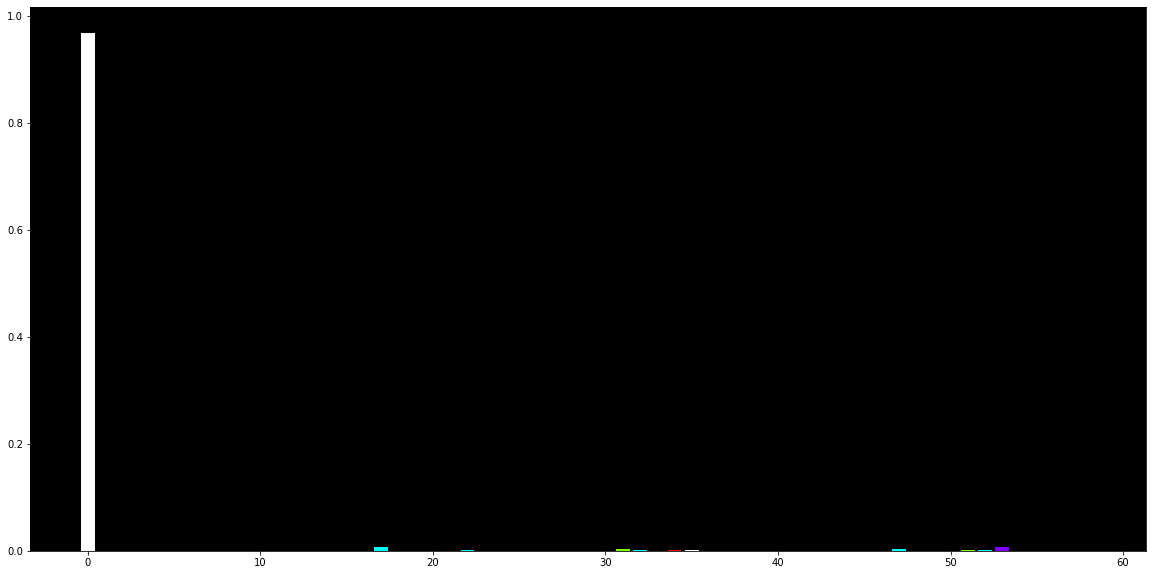

In [11]:
from pylab import rcParams 
rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.facecolor'] = 'black'
k=0
plt.bar(np.array(list(class_counts.keys()))[k:], 
        np.array(list(class_counts.values()))[k:] / sum(np.array(list(class_counts.values()))[:]),
        color=colormap[k:] / 255)
plt.show()

In [48]:
import pandas as pd

red = pd.read_csv('../label_reduction.csv')
line_0 = pd.DataFrame(np.array([[None, None, 0, 0]]), columns=['key', 'value', 'priority', 'new_priority'])
red = pd.concat([line_0, red], ignore_index=True)

In [49]:
red

,key,value,priority,new_priority
0,None,None,0,0
1,waterway,river,1,0
2,waterway,canal,2,0
3,railway,abandoned,3,1
4,power,tower,4,4
5,power,substation,5,2
6,power,pole,6,4
7,power,plant,7,2
8,natural,tree,8,0
9,natural,heath,9,0


In [8]:
data_dir = "/home/ss1072/data_overfit/patches/"
image_list = misc_utils.load_file("/home/ss1072/data_overfit/file_list_train.txt")
img_list, lbl_list = data_loader.get_file_paths(data_dir, image_list)

target_dir = '/home/ss1072/data_overfit/patches/'
target_img_list, target_lbl_list = data_loader.get_file_paths(target_dir, image_list)

In [90]:
for i, lbl_file in enumerate(tqdm(lbl_list)):
    img = misc_utils.load_file(img_list[i])
    lbl = misc_utils.load_file(lbl_file)
    for j, row in red.iterrows(): 
        lbl[lbl == row['priority']] = row['new_priority']
    misc_utils.save_file(target_img_list[i], img.astype(np.uint8))
    misc_utils.save_file(target_lbl_list[i], lbl.astype(np.uint8))


100%|██████████| 100/100 [00:01<00:00, 51.19it/s]
